In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv', encoding='cp1252')
test = pd.read_csv('test.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.compliance.fillna(0.0,inplace=True)
train.fine_amount.fillna(0.0,inplace=True)

In [4]:
cc = Counter(train.compliance)
print('training set %:',cc[0]/len(train)*100, 'test set %:',cc[1]/len(train)*100)

training set %: 95.36687094995725 test set %: 4.633129050042747


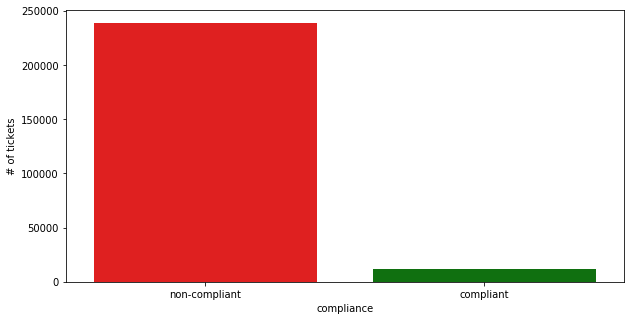

In [18]:
plt.figure(figsize=(10,5))
sns.countplot('compliance', data=train, palette={0:'red',1:'green'})
ax = plt.gca()
ax.set_ylabel('# of tickets')
ax.set_xticklabels(['non-compliant','compliant']);

The graph and the Counter function are showing that the data is highly imbalanced. Most of data is 0, which means as a measure of accuracy, auc_roc method is more encouraged to use.

In [15]:
set(train.fine_amount)

{0.0,
 1.0,
 20.0,
 25.0,
 50.0,
 95.0,
 100.0,
 125.0,
 150.0,
 160.0,
 170.0,
 200.0,
 220.0,
 250.0,
 270.0,
 300.0,
 345.0,
 350.0,
 375.0,
 400.0,
 450.0,
 500.0,
 600.0,
 655.0,
 677.0,
 750.0,
 970.0,
 1000.0,
 1030.0,
 1200.0,
 1250.0,
 1470.0,
 1500.0,
 1750.0,
 2000.0,
 2500.0,
 2695.0,
 3000.0,
 3500.0,
 5000.0,
 7000.0,
 8000.0,
 10000.0}

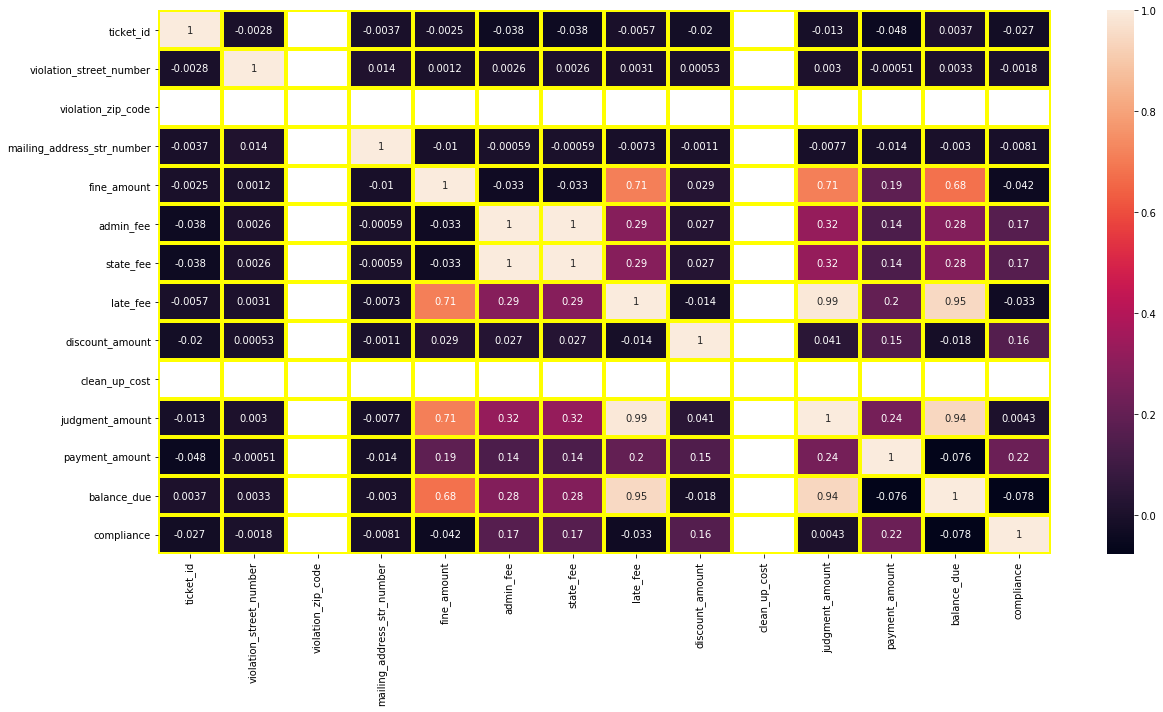

In [22]:
plt.figure(figsize=(15,5))
sns.heatmap(train.corr(),annot=True,linewidth=3,linecolor='yellow');

In [20]:
train.corr()

,ticket_id,violation_street_number,violation_zip_code,mailing_address_str_number,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,compliance
ticket_id,1.000000,-0.002827,NaN,-0.003678,-0.002518,-0.038099,-0.038099,-0.005715,-0.019900,NaN,-0.012859,-0.048120,0.003718,-0.027025
violation_street_number,-0.002827,1.000000,NaN,0.013532,0.001184,0.002639,0.002639,0.003138,0.000531,NaN,0.003012,-0.000514,0.003301,-0.001824
violation_zip_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mailing_address_str_number,-0.003678,0.013532,NaN,1.000000,-0.009989,-0.000592,-0.000592,-0.007281,-0.001119,NaN,-0.007744,-0.013847,-0.002966,-0.008103
fine_amount,-0.002518,0.001184,NaN,-0.009989,1.000000,-0.032691,-0.032691,0.712581,0.029248,NaN,0.712200,0.185202,0.677729,-0.042417
admin_fee,-0.038099,0.002639,NaN,-0.000592,-0.032691,1.000000,1.000000,0.286289,0.027442,NaN,0.322319,0.139338,0.275884,0.165763
state_fee,-0.038099,0.002639,NaN,-0.000592,-0.032691,1.000000,1.000000,0.286289,0.027442,NaN,0.322319,0.139338,0.275884,0.165763
late_fee,-0.005715,0.003138,NaN,-0.007281,0.712581,0.286289,0.286289,1.000000,-0.013891,NaN,0.989371,0.198416,0.948404,-0.032912
discount_amount,-0.019900,0.000531,NaN,-0.001119,0.029248,0.027442,0.027442,-0.013891,1.000000,NaN,0.040895,0.148797,-0.018124,0.158404
clean_up_cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[0.0, 0.0, 0.0, 0.0]